<a href="https://colab.research.google.com/github/Jannat3226/Used-car-price-prediction/blob/main/car_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/fall23/archive_7/used_cars.csv")

In [ ]:
data.head()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW


In [ ]:
data.tail()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
99182,10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi
99183,10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi
99184,10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi
99185,10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi
99186,10667,Q3,2016,15999,Manual,11855,Petrol,150,47.9,1.4,Audi


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99187 non-null  int64  
 1   model         99187 non-null  object 
 2   year          99187 non-null  int64  
 3   price         99187 non-null  int64  
 4   transmission  99187 non-null  object 
 5   mileage       99187 non-null  int64  
 6   fuelType      99187 non-null  object 
 7   tax           99187 non-null  int64  
 8   mpg           99187 non-null  float64
 9   engineSize    99187 non-null  float64
 10  Make          99187 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.3+ MB


In [ ]:
data.nunique()

Unnamed: 0      17965
model             195
year               27
price           13236
transmission        4
mileage         42214
fuelType            5
tax                48
mpg               208
engineSize         40
Make                9
dtype: int64

In [ ]:
data.isnull().sum()

Unnamed: 0      0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [ ]:
(data.isnull().sum()/(len(data)))*100

Unnamed: 0      0.0
model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
Make            0.0
dtype: float64

In [ ]:
# Remove tax column from data
data = data.drop(['tax'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99187 non-null  int64  
 1   model         99187 non-null  object 
 2   year          99187 non-null  int64  
 3   price         99187 non-null  int64  
 4   transmission  99187 non-null  object 
 5   mileage       99187 non-null  int64  
 6   fuelType      99187 non-null  object 
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   Make          99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.6+ MB


In [ ]:
#new column new_age
from datetime import date
date.today().year
data['new_Age']=date.today().year-data['year']
data.head()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,mpg,engineSize,Make,new_Age
0,0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0,VW,4
1,1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0,VW,4
2,2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0,VW,4
3,3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0,VW,4
4,4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5,VW,4


In [ ]:
data['Brand'] = data.model.str.split().str.get(0)

In [ ]:
data['0'] = data.model.str.split().str.get(1) + data.model.str.split().str.get(2)

In [ ]:
data[['0','Brand','model']]

,0,Brand,model
0,NaN,T-Roc,T-Roc
1,NaN,T-Roc,T-Roc
2,NaN,T-Roc,T-Roc
3,NaN,T-Roc,T-Roc
4,NaN,T-Roc,T-Roc
...,...,...,...
99182,NaN,A3,A3
99183,NaN,A3,A3
99184,NaN,A3,A3
99185,NaN,Q3,Q3


In [ ]:
print(data.Brand.unique())
print(data.Brand.nunique())

['T-Roc' 'Golf' 'Passat' 'T-Cross' 'Polo' 'Tiguan' 'Sharan' 'Up'
 'Scirocco' 'Beetle' 'Caddy' 'Caravelle' 'Touareg' 'Arteon' 'Touran'
 'Amarok' 'Shuttle' 'Jetta' 'CC' 'California' 'Eos' 'Fox' 'Corsa' 'Astra'
 'Viva' 'Mokka' 'Crossland' 'Zafira' 'Meriva' 'Adam' 'Grandland' 'Antara'
 'Insignia' 'Ampera' 'GTC' 'Combo' 'Vivaro' 'Cascada' 'Kadjar' 'Agila'
 'Tigra' 'Vectra' 'GT86' 'Corolla' 'RAV4' 'Yaris' 'Auris' 'Aygo' 'C-HR'
 'Prius' 'Avensis' 'Verso' 'Hilux' 'PROACE' 'Land' 'Supra' 'Camry'
 'Verso-S' 'IQ' 'Urban' 'Octavia' 'Citigo' 'Yeti' 'Superb' 'Kodiaq'
 'Rapid' 'Karoq' 'Fabia' 'Scala' 'Roomster' 'Kamiq' 'SLK' 'S' 'SL' 'G'
 'GLE' 'GLA' 'A' 'B' 'GLC' 'C' 'E' 'GL' 'CLS' 'CLC' 'CLA' 'V' 'M' 'CL'
 'GLS' 'GLB' 'X-CLASS' '180' 'CLK' 'R' '230' '220' '200' 'I20' 'Tucson'
 'I10' 'IX35' 'I30' 'I40' 'Ioniq' 'Kona' 'Veloster' 'I800' 'IX20' 'Santa'
 'Accent' 'Terracan' 'Getz' 'Amica' 'Fiesta' 'Focus' 'Puma' 'Kuga'
 'EcoSport' 'C-MAX' 'Mondeo' 'Ka+' 'Tourneo' 'S-MAX' 'B-MAX' 'Edge'
 'Grand' 'KA' 'Ga

In [ ]:
searchfor = ['Beetle' ,'Caddy' ,'Caravelle' ,'Touareg' ]
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,mpg,engineSize,Make,new_Age,Brand,0
13249,13249,Beetle,2016,13000,Manual,20991,Petrol,51.4,1.2,VW,7,Beetle,NaN
13250,13250,Beetle,2016,12500,Manual,23500,Diesel,61.4,2.0,VW,7,Beetle,NaN
13251,13251,Beetle,2015,10950,Manual,32800,Petrol,47.9,1.2,VW,8,Beetle,NaN
13252,13252,Beetle,2015,10995,Manual,50000,Diesel,61.4,2.0,VW,8,Beetle,NaN
13253,13253,Beetle,2013,7691,Manual,52750,Diesel,57.6,2.0,VW,10,Beetle,NaN


In [ ]:
data["Brand"].replace({'Beetle':'Beetle' ,'Caddy':'Caddy' ,'Caravelle':'Caravelle' ,'Touareg':'Touareg'}, inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,99187.0,6294.413532,4265.588536,0.0,2755.0,5591.0,9420.0,17964.0
year,99187.0,2017.087723,2.123934,1970.0,2016.0,2017.0,2019.0,2060.0
price,99187.0,16805.347656,9866.773417,450.0,9999.0,14495.0,20870.0,159999.0
mileage,99187.0,23058.914213,21148.523721,1.0,7425.0,17460.0,32339.0,323000.0
mpg,99187.0,55.166825,16.138522,0.3,47.1,54.3,62.8,470.8
engineSize,99187.0,1.663280,0.557646,0.0,1.2,1.6,2.0,6.6
new_Age,99187.0,5.912277,2.123934,-37.0,4.0,6.0,7.0,53.0


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,99187.0,NaN,NaN,NaN,6294.413532,4265.588536,0.0,2755.0,5591.0,9420.0,17964.0
model,99187,195,Fiesta,6557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,99187.0,NaN,NaN,NaN,2017.087723,2.123934,1970.0,2016.0,2017.0,2019.0,2060.0
price,99187.0,NaN,NaN,NaN,16805.347656,9866.773417,450.0,9999.0,14495.0,20870.0,159999.0
transmission,99187,4,Manual,56445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,99187.0,NaN,NaN,NaN,23058.914213,21148.523721,1.0,7425.0,17460.0,32339.0,323000.0
fuelType,99187,5,Petrol,54928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mpg,99187.0,NaN,NaN,NaN,55.166825,16.138522,0.3,47.1,54.3,62.8,470.8
engineSize,99187.0,NaN,NaN,NaN,1.66328,0.557646,0.0,1.2,1.6,2.0,6.6
Make,99187,9,ford,17965,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['model', 'transmission', 'fuelType', 'Make', 'Brand', '0'], dtype='object')
Numerical Variables:
['Unnamed: 0', 'year', 'price', 'mileage', 'mpg', 'engineSize', 'new_Age']


Unnamed: 0
Skew : 0.53


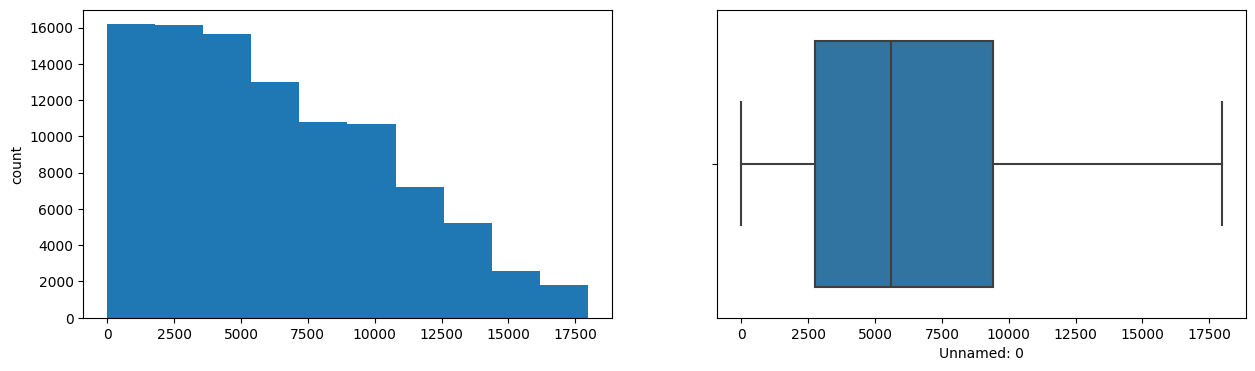

year
Skew : -1.9


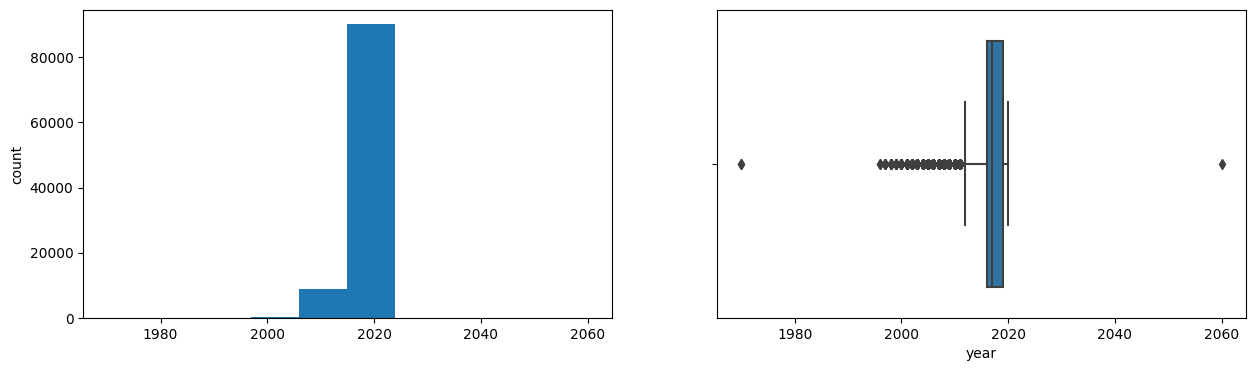

price
Skew : 2.35


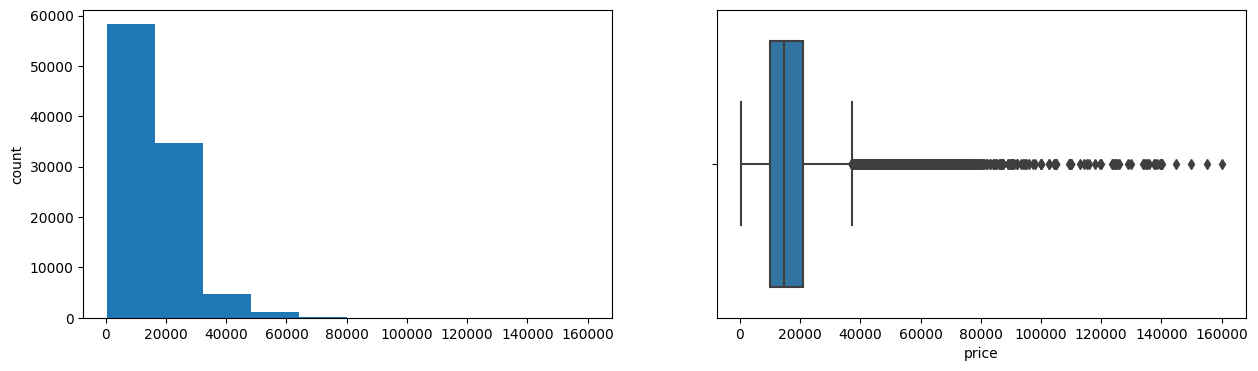

mileage
Skew : 1.79


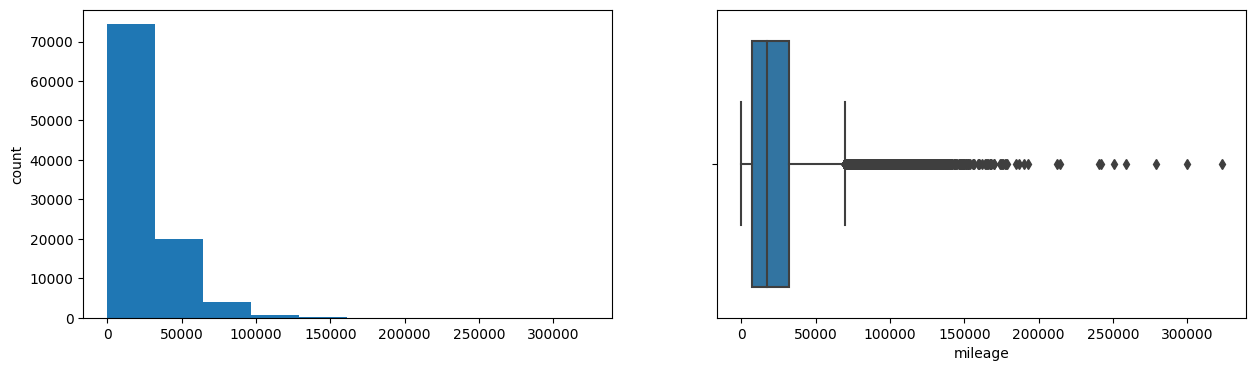

mpg
Skew : 8.94


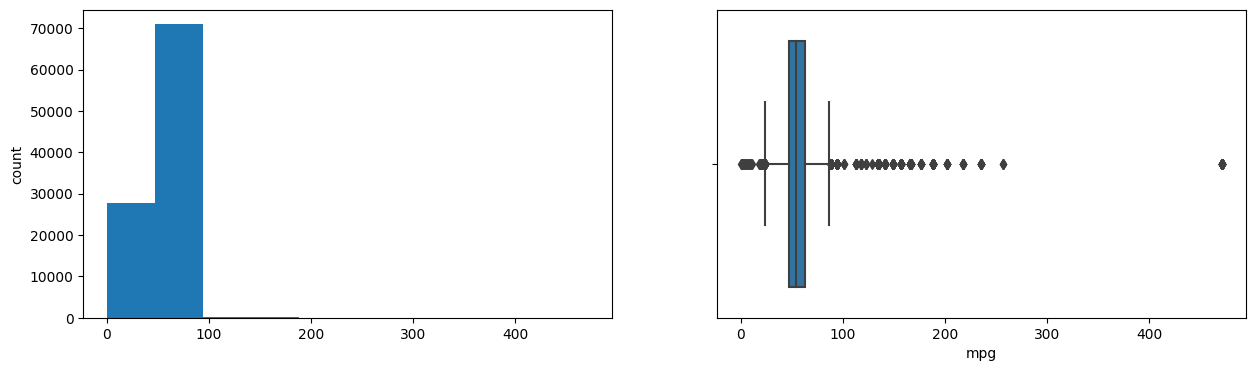

engineSize
Skew : 1.31


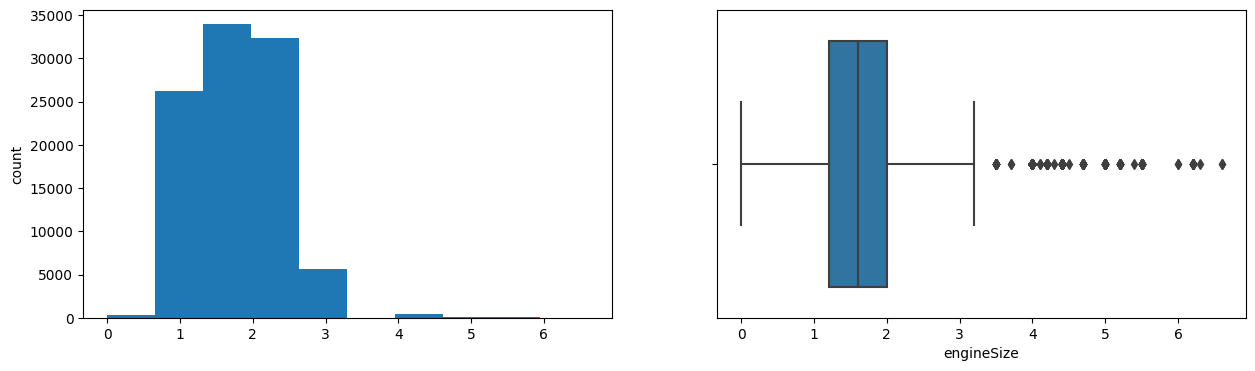

new_Age
Skew : 1.9


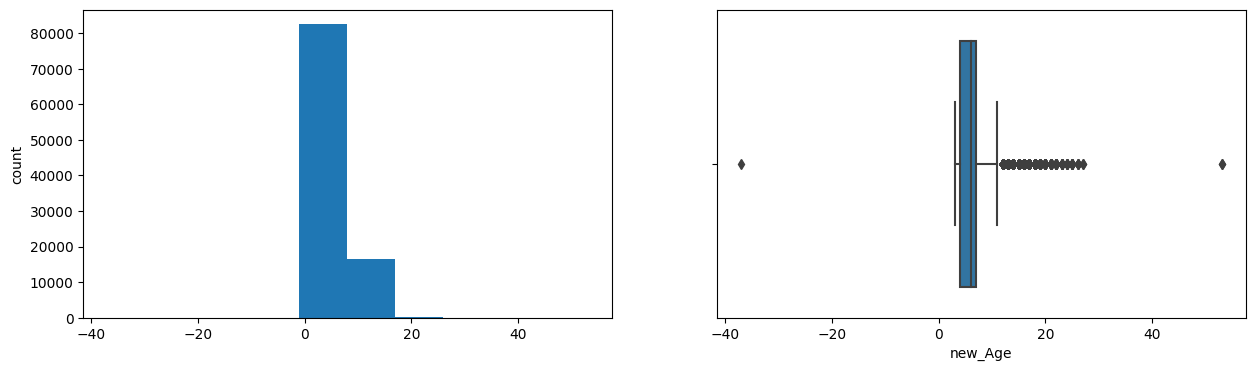

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

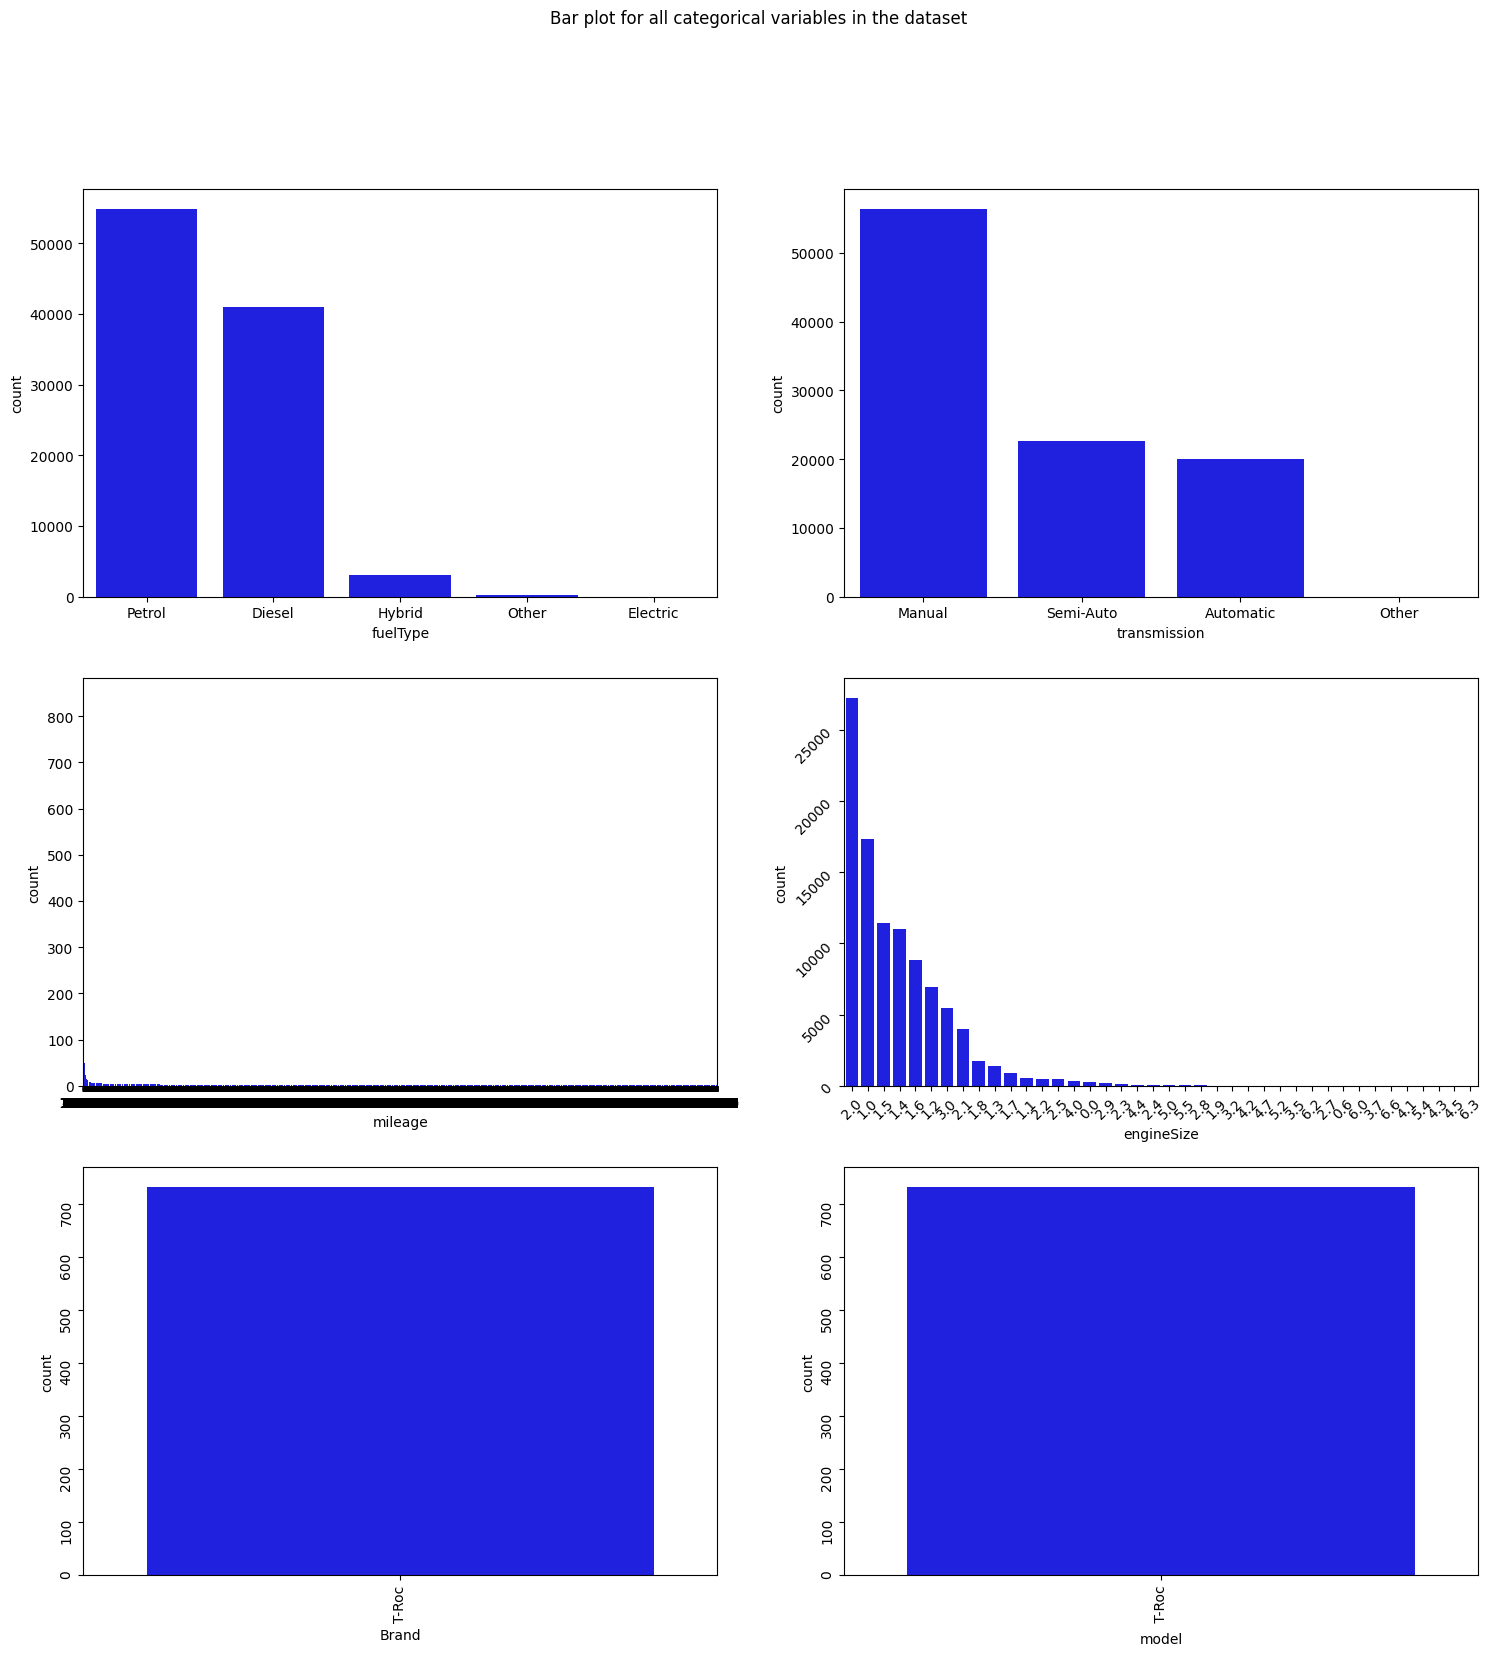

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'fuelType', data = data, color = 'blue',
              order = data['fuelType'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'transmission', data = data, color = 'blue',
              order = data['transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'mileage', data = data, color = 'blue',
              order = data['mileage'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'engineSize', data = data, color = 'blue',
              order = data['engineSize'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue',
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'model', data = data, color = 'blue',
              order = data['model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [ ]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [ ]:
log_transform(data,['mileage','price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99187 non-null  int64  
 1   model         99187 non-null  object 
 2   year          99187 non-null  int64  
 3   price         99187 non-null  int64  
 4   transmission  99187 non-null  object 
 5   mileage       99187 non-null  int64  
 6   fuelType      99187 non-null  object 
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   Make          99187 non-null  object 
 10  new_Age       99187 non-null  int64  
 11  Brand         99187 non-null  object 
 12  0             118 non-null    object 
 13  mileage_log   99187 non-null  float64
 14  price_log     99187 non-null  float64
dtypes: float64(4), int64(5), object(6)
memory usage: 11.4+ MB


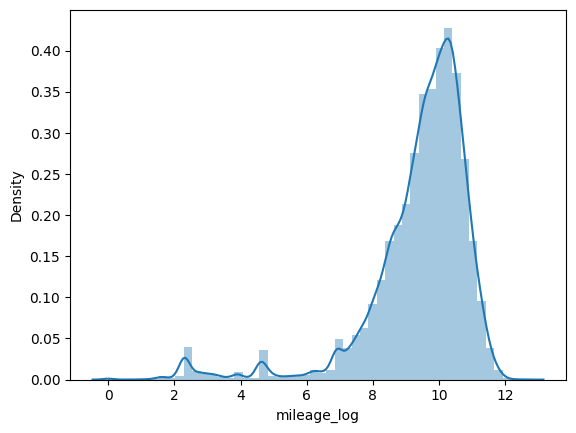

In [ ]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["mileage_log"], axlabel="mileage_log");

<Figure size 1300x1700 with 0 Axes>

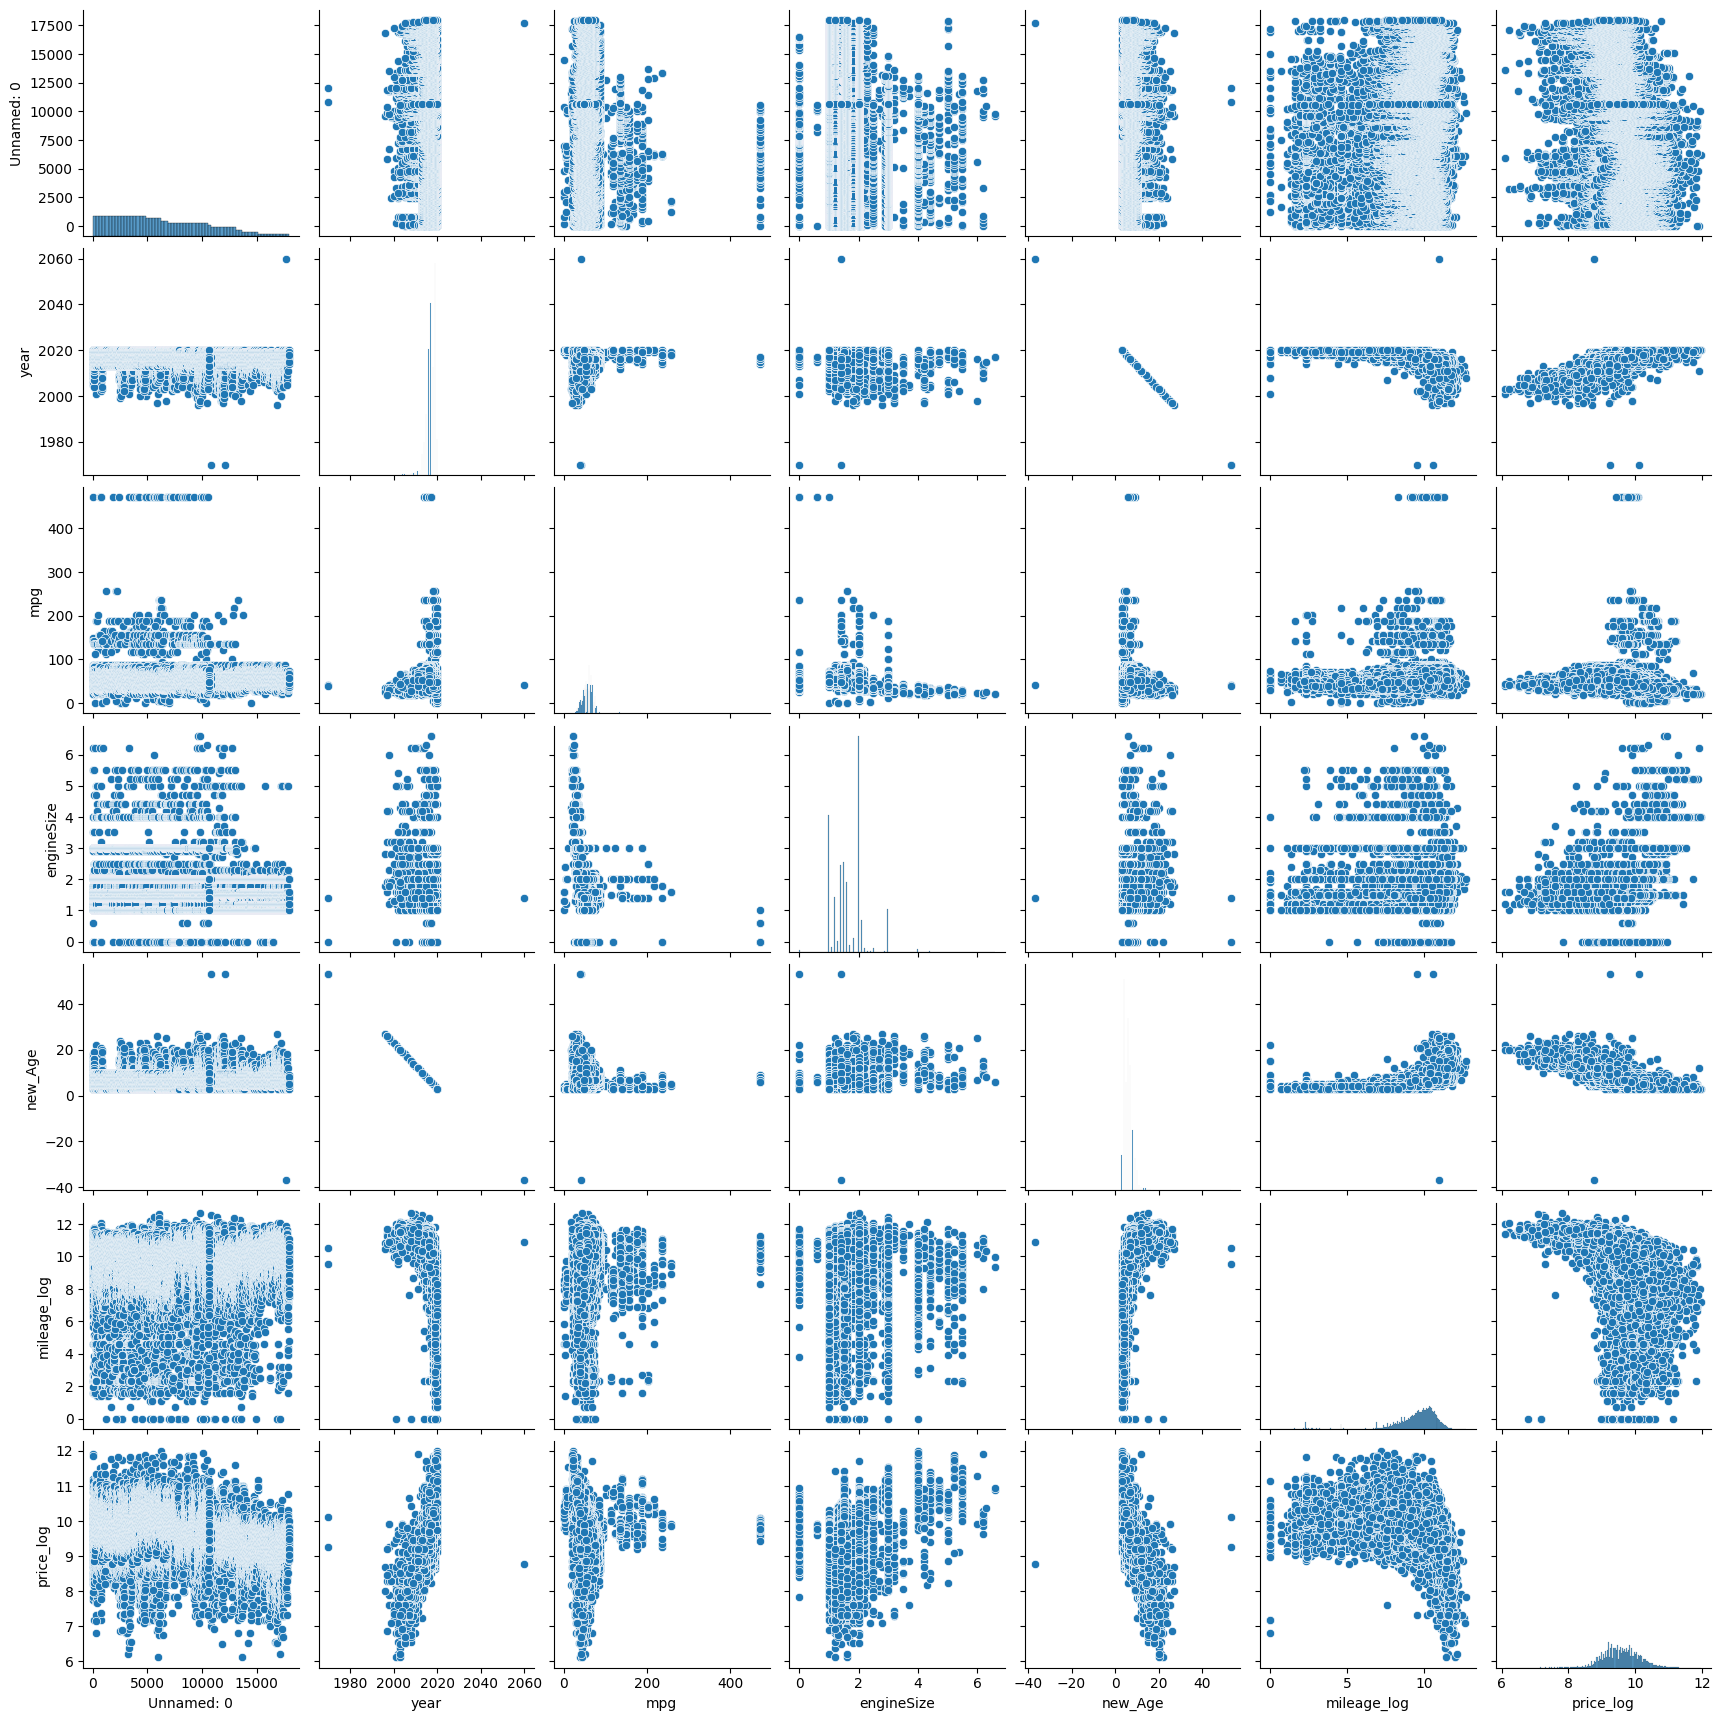

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['mileage','price'],axis=1))
plt.show()

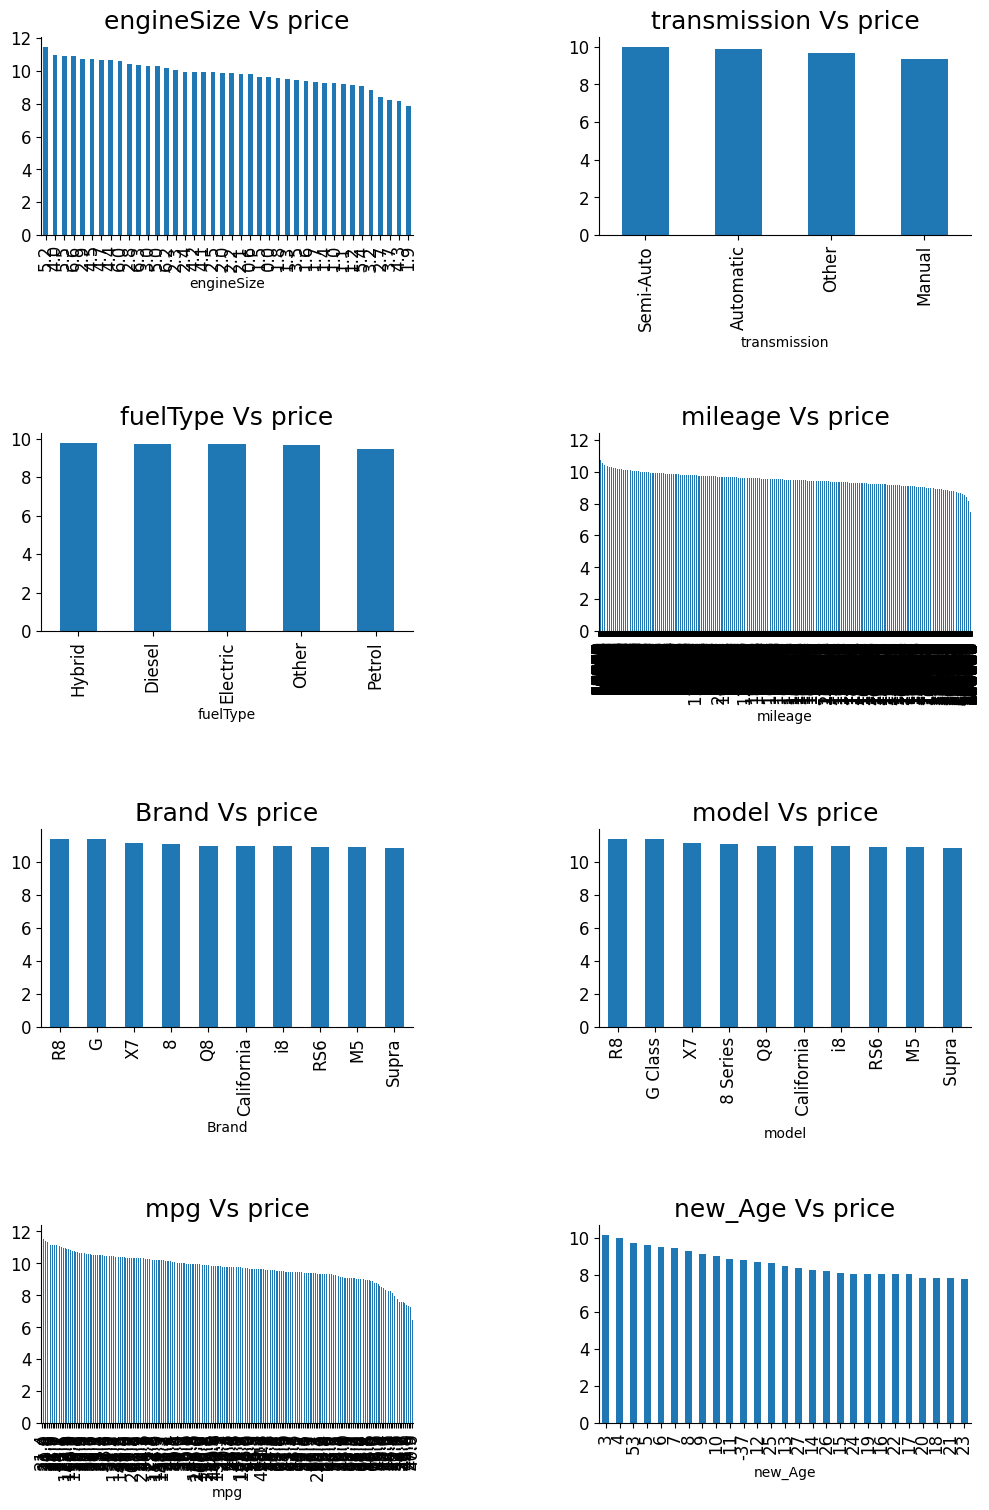

In [ ]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('engineSize')['price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("engineSize Vs price", fontsize=18)
data.groupby('transmission')['price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("transmission Vs price", fontsize=18)
data.groupby('fuelType')['price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("fuelType Vs price", fontsize=18)
data.groupby('mileage')['price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("mileage Vs price", fontsize=18)
data.groupby('Brand')['price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs price", fontsize=18)
data.groupby('model')['price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("model Vs price", fontsize=18)
data.groupby('mpg')['price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("mpg Vs price", fontsize=18)
data.groupby('new_Age')['price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("new_Age Vs price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

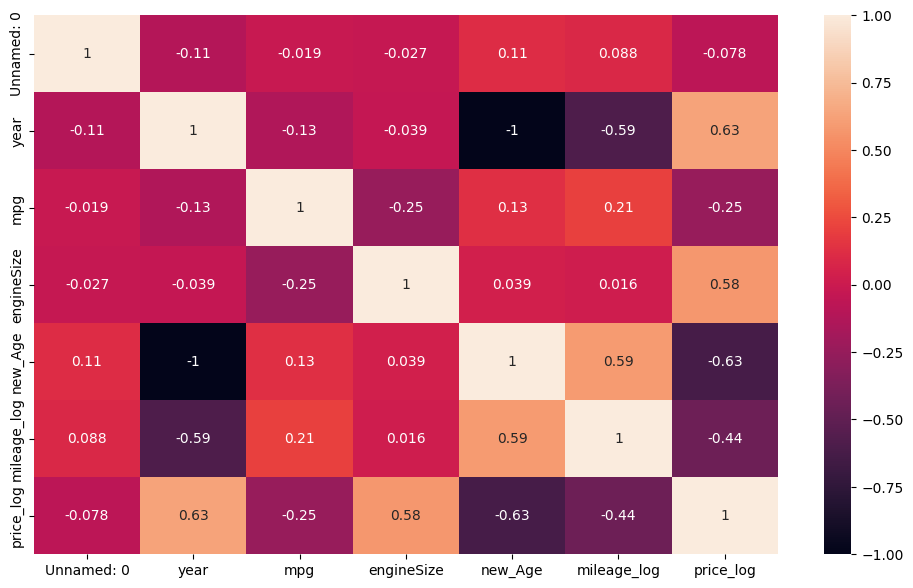

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['mileage','price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [ ]:
data.loc[data["mileage"]==0.0,'mileage']=np.nan
data.mileage.isnull().sum()

0

In [ ]:
data.mpg.isnull().sum()
data['mpg'].fillna(value=np.nan,inplace=True)
data['mpg']=data.groupby(['model','Brand'])['mpg'].apply(lambda x:x.fillna(x.median()))
data['engineSize']=data.groupby(['Brand','model'])['engineSize'].apply(lambda x:x.fillna(x.median()))
